#Decision Trees and Random Forest - Loan Eligibility Prediction

## Context: 

Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Objective:

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Attributes Information:

* Variable:	------------------------------     Description
* Loan_ID:	-------------------------------          Unique Loan ID
* Gender:	  --------------------------------        Male/ Female
* Married:	-------------------------------          Applicant married (Y/N)
* Dependents:--------------------------	      Number of dependents
* Education:----------------------------      Applicant Education (Graduate/ Under Graduate)
* Self_Employed:--------------------	  Self employed (Y/N)
* ApplicantIncome:-----------------	  Applicant income
* CoapplicantIncome:------------- Coapplicant income
* LoanAmount:------------------------	      Loan amount in thousands
* Loan_Amount_Term:------------  Term of loan in months
* Credit_History:----------------------	  credit history meets guidelines
* Property_Area:----------------------	  Urban/ Semi Urban/ Rural
* Loan_Status:-------------------------	      Loan approved (Y/N)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

### Import Libraries and Load Dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [ ]:
df = pd.read_csv('CreditRisk.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [ ]:
print(df.shape)

(614, 13)


### Exploring data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null int64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 62.4+ KB


In [ ]:
# Lets analysze the distribution of the various attribute

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


**Insights:** `CoapplicantIncome and LoanAmount has 0's that can't happen so no need to fill these values`

In [ ]:
df.nunique() # Number of unique values in a column

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

**Insights:**
- `Loan_Amount_Term is categorical as it has only 10 unique values`
- `Loan_ID column has all unique values and it not a continous column so it has 614 categories one for each row and that would not provide any info to the algorithm`

In [ ]:
cr_df = df.drop('Loan_ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


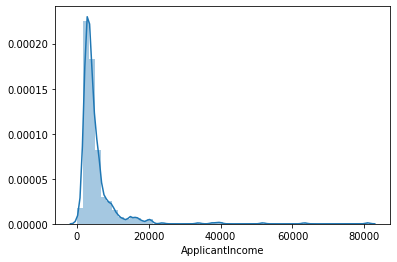

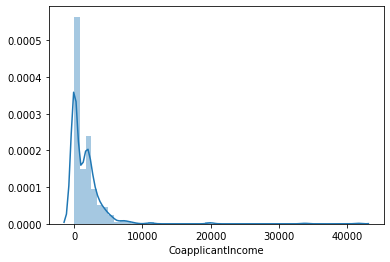

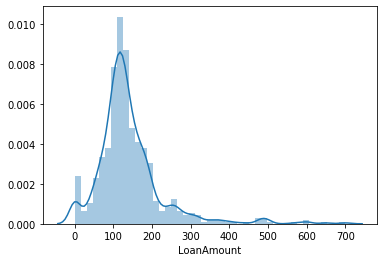

In [ ]:
# distplot for continous columns
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.distplot(df[i])
    plt.show()

In [ ]:
cr_df['Loan_Amount_Term'].value_counts(normalize = True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [ ]:
#The Loan_Amount_Term is highly skewed - so we will delete this column

cr_df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

In [ ]:
cr_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

### Complete the below snippets to generate the countplots for all the categorical columns

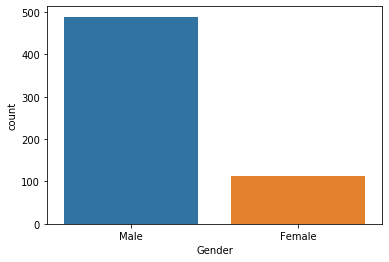

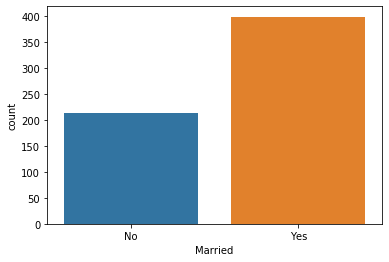

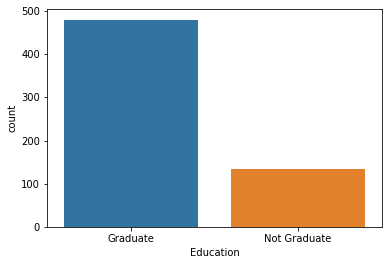

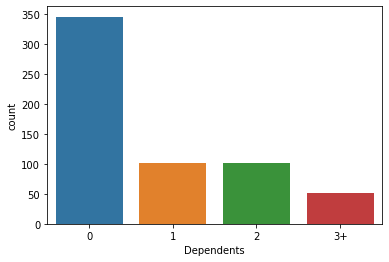

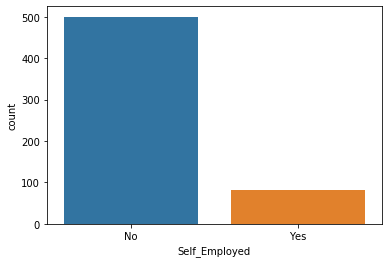

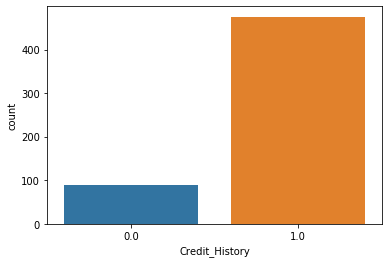

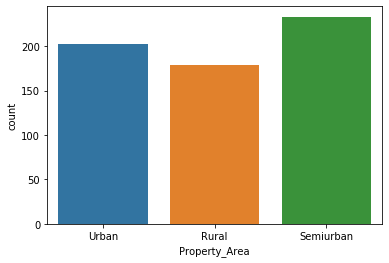

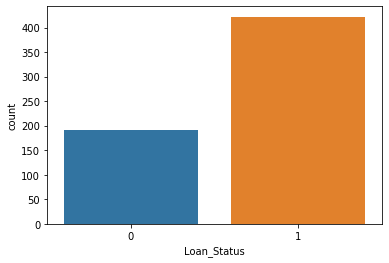

In [ ]:
for i in ['Gender','Married','Education','Dependents','Self_Employed','Credit_History','Property_Area','Loan_Status']:
    sns.countplot(cr_df[i])
    plt.show()

### Null Values Treatment


In [ ]:
cr_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
cr_df['Credit_History'].fillna(0,inplace=True)

cr_df['Self_Employed'].fillna('No',inplace=True) #replacing with mode

cr_df['Dependents'].fillna('0',inplace=True) #replacing with mode

In [ ]:
# Drawing relationship between Loan_Status, Gender, Property_Area, Married

df.groupby(['Loan_Status','Gender','Property_Area'])['Married'].value_counts()

Loan_Status  Gender  Property_Area  Married
0            Female  Rural          No           7
                                    Yes          3
                     Semiurban      No          12
                                    Yes          1
                     Urban          No          10
                                    Yes          4
             Male    Rural          Yes         39
                                    No          18
                     Semiurban      Yes         27
                                    No          12
                     Urban          Yes         35
                                    No          19
1            Female  Rural          No          12
                                    Yes          2
                     Semiurban      No          22
                                    Yes         19
                     Urban          No          17
                                    Yes          2
             Male    Rural          Ye

In [ ]:
cr_df[cr_df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
104,Male,NaN,0,Graduate,No,3816,754.0,160,1.0,Urban,1
228,Male,NaN,0,Graduate,No,4758,0.0,158,1.0,Semiurban,1
435,Female,NaN,0,Graduate,No,10047,0.0,0,1.0,Semiurban,1


**Insights:**
- `When Gender is Male Loan Status is 1 and Propert_Area is Urban then mostly they are married.(mode)`

In [ ]:
## Replacing with mode observed in above mentioned relationship:

cr_df.loc[104,'Married'] = 'Yes'
cr_df.loc[228,'Married'] = 'Yes'
cr_df.loc[435,'Married'] = 'No'

In [ ]:
cr_df.isnull().sum()

Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### Bivariate Analysis


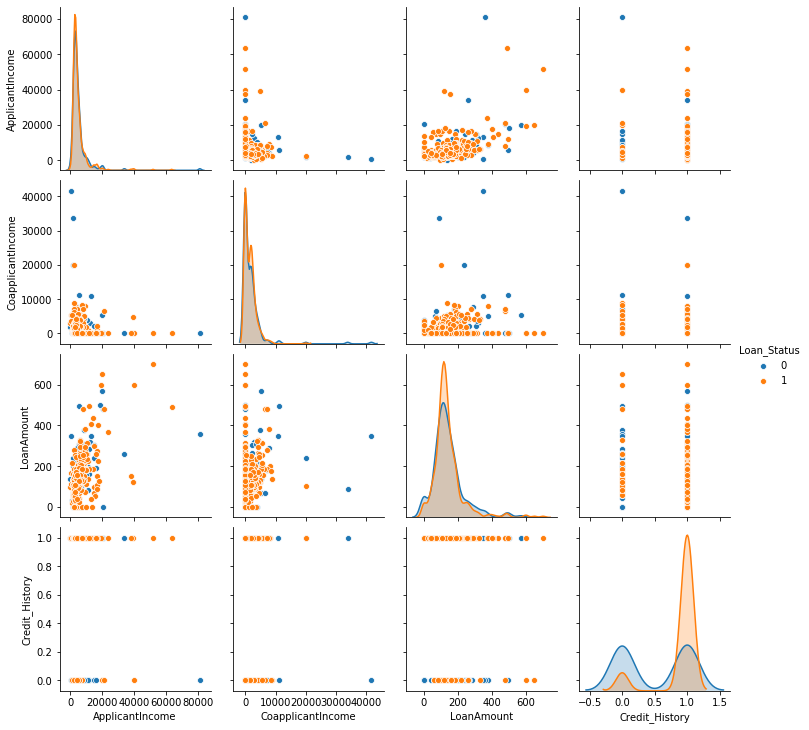

In [ ]:
sns.pairplot(cr_df, hue = 'Loan_Status')

In [ ]:
cr_df.groupby('Gender')['CoapplicantIncome'].median()
cr_df.groupby('Gender')['CoapplicantIncome'].mean()

Gender
Female    1108.008929
Male      1742.932352
Name: CoapplicantIncome, dtype: float64

In [ ]:
pd.crosstab(cr_df['Gender'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


In [ ]:
pd.crosstab(cr_df['Married'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Married,,
No,0.369159,0.630841
Yes,0.282500,0.717500


In [ ]:
pd.crosstab(cr_df['Education'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


In [ ]:
pd.crosstab(cr_df['Self_Employed'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Self_Employed,,
No,0.864583,0.867299
Yes,0.135417,0.132701


**Insights:**
- `Self Employed people have same distribution, We should check how this feature influences final model using coefficients`

In [ ]:
pd.crosstab(cr_df['Dependents'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Dependents,,
0,0.588542,0.585308
1,0.187500,0.156398
2,0.130208,0.180095
3+,0.093750,0.078199


In [ ]:
pd.crosstab(cr_df['Property_Area'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Property_Area,,
Rural,0.359375,0.260664
Semiurban,0.281250,0.424171
Urban,0.359375,0.315166


### Data Preparation


In [ ]:
# Define X and Y variables

X = cr_df.drop(columns = {'Loan_Status'})
Y = cr_df['Loan_Status'].astype('category')     

In [ ]:
# Convert categorical vriables to dummy variables

X = pd.get_dummies(X, drop_first=True)

### Split the data into train, val and test set

In [ ]:
## Split into training and test set
from sklearn.model_selection import train_test_split

# Split in train and test (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7, stratify = Y)

# Further splt the train into train and validation (70:30)
X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=0.30,random_state=7, stratify = y_train )

### Model building using Decision Trees

- Initialising the tree
- Fitting the train data on the tree model
- Reporting the classification metrics on the train and validation set
- Commenting on which metric is more important if the cost of giving loan to a potential defaulter is very high and should be minimised through the modelling process.
- Loop through the different values of max_depth to observe the recall on class 0 (refer to the codes available in the self study/MLS slides) and figure out its best value to reduce overfitting. Also, keep in mind the performance on the val set. Report the results into a dataframe.
- Fitting the train data with the max_depth observed above.
- Report the classification report on the test set and present the final observations.
 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# initialise the decision tree criterion  = 'entropy'.
dtc =  DecisionTreeClassifier(criterion='entropy', random_state = 42)

# fit the tree (fully grown) and report the metrics on the train set.
dtc.fit(X_train, y_train)

print(classification_report(y_train , dtc.predict(X_train)))
print(classification_report(y_val, dtc.predict(X_val)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       206

   micro avg       1.00      1.00      1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

              precision    recall  f1-score   support

           0       0.44      0.45      0.44        40
           1       0.75      0.74      0.75        89

   micro avg       0.65      0.65      0.65       129
   macro avg       0.59      0.60      0.60       129
weighted avg       0.65      0.65      0.65       129



**Comments:** 

The overall accuracies are 1.00 and 0.65 for the train and the validation set respectively.
Recall metric is more important because the cost of giving loan to a potential defaulter is very high and should be minimised through the modelling process

In [ ]:
from sklearn.metrics import recall_score
dict_recall = {}

for max_depth in range(3,21):
    lista = []
    dtree = DecisionTreeClassifier(criterion = 'entropy',max_depth=max_depth, random_state=42)
    dtree.fit(X_train, y_train)
    lista.append(recall_score(y_train, dtree.predict(X_train), pos_label = 1))
    lista.append(recall_score(y_val, dtree.predict(X_val), pos_label = 1))
    dict_recall[max_depth] = lista

df = pd.DataFrame(dict_recall)
df.index = ['Train', 'Val']
df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Train,0.912621,0.946602,0.956311,0.951456,0.985437,0.985437,0.966019,0.980583,0.985437,0.995146,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Val,0.887640,0.910112,0.842697,0.797753,0.842697,0.775281,0.752809,0.752809,0.764045,0.752809,0.741573,0.741573,0.741573,0.741573,0.741573,0.741573,0.741573,0.741573


**Comments about the max_depth:**

The Decision Tree is giving a recall of 1 for label 1 from 13th depth onwards that means it's max_depth is 13 whc indicates longest path between root node and the leaf node.

In [ ]:
dtcf = DecisionTreeClassifier(max_depth = 13, criterion='entropy', random_state=42)

# Fit the data on the train set here
dtcf.fit(X_train, y_train)

# Print the classification report on the test data here

print(classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.52      0.55      0.53        58
           1       0.79      0.76      0.78       127

   micro avg       0.70      0.70      0.70       185
   macro avg       0.65      0.66      0.65       185
weighted avg       0.70      0.70      0.70       185



**Observations:**

Our model has an overall accuracy score of 0.70 on the test set compared to a perfect score on the train data.

The recall score for class 1 is 0.76 on the test set. This means the model would be correctly able to identify 67% of the customer's loan eligibility. Also, it has a score of 55% in figuring out the ones who would not.

### Visualise the tree

In [ ]:
#!pip install --upgrade scikit-learn==0.20.3
#!pip install pydotplus
#!pip install graphviz

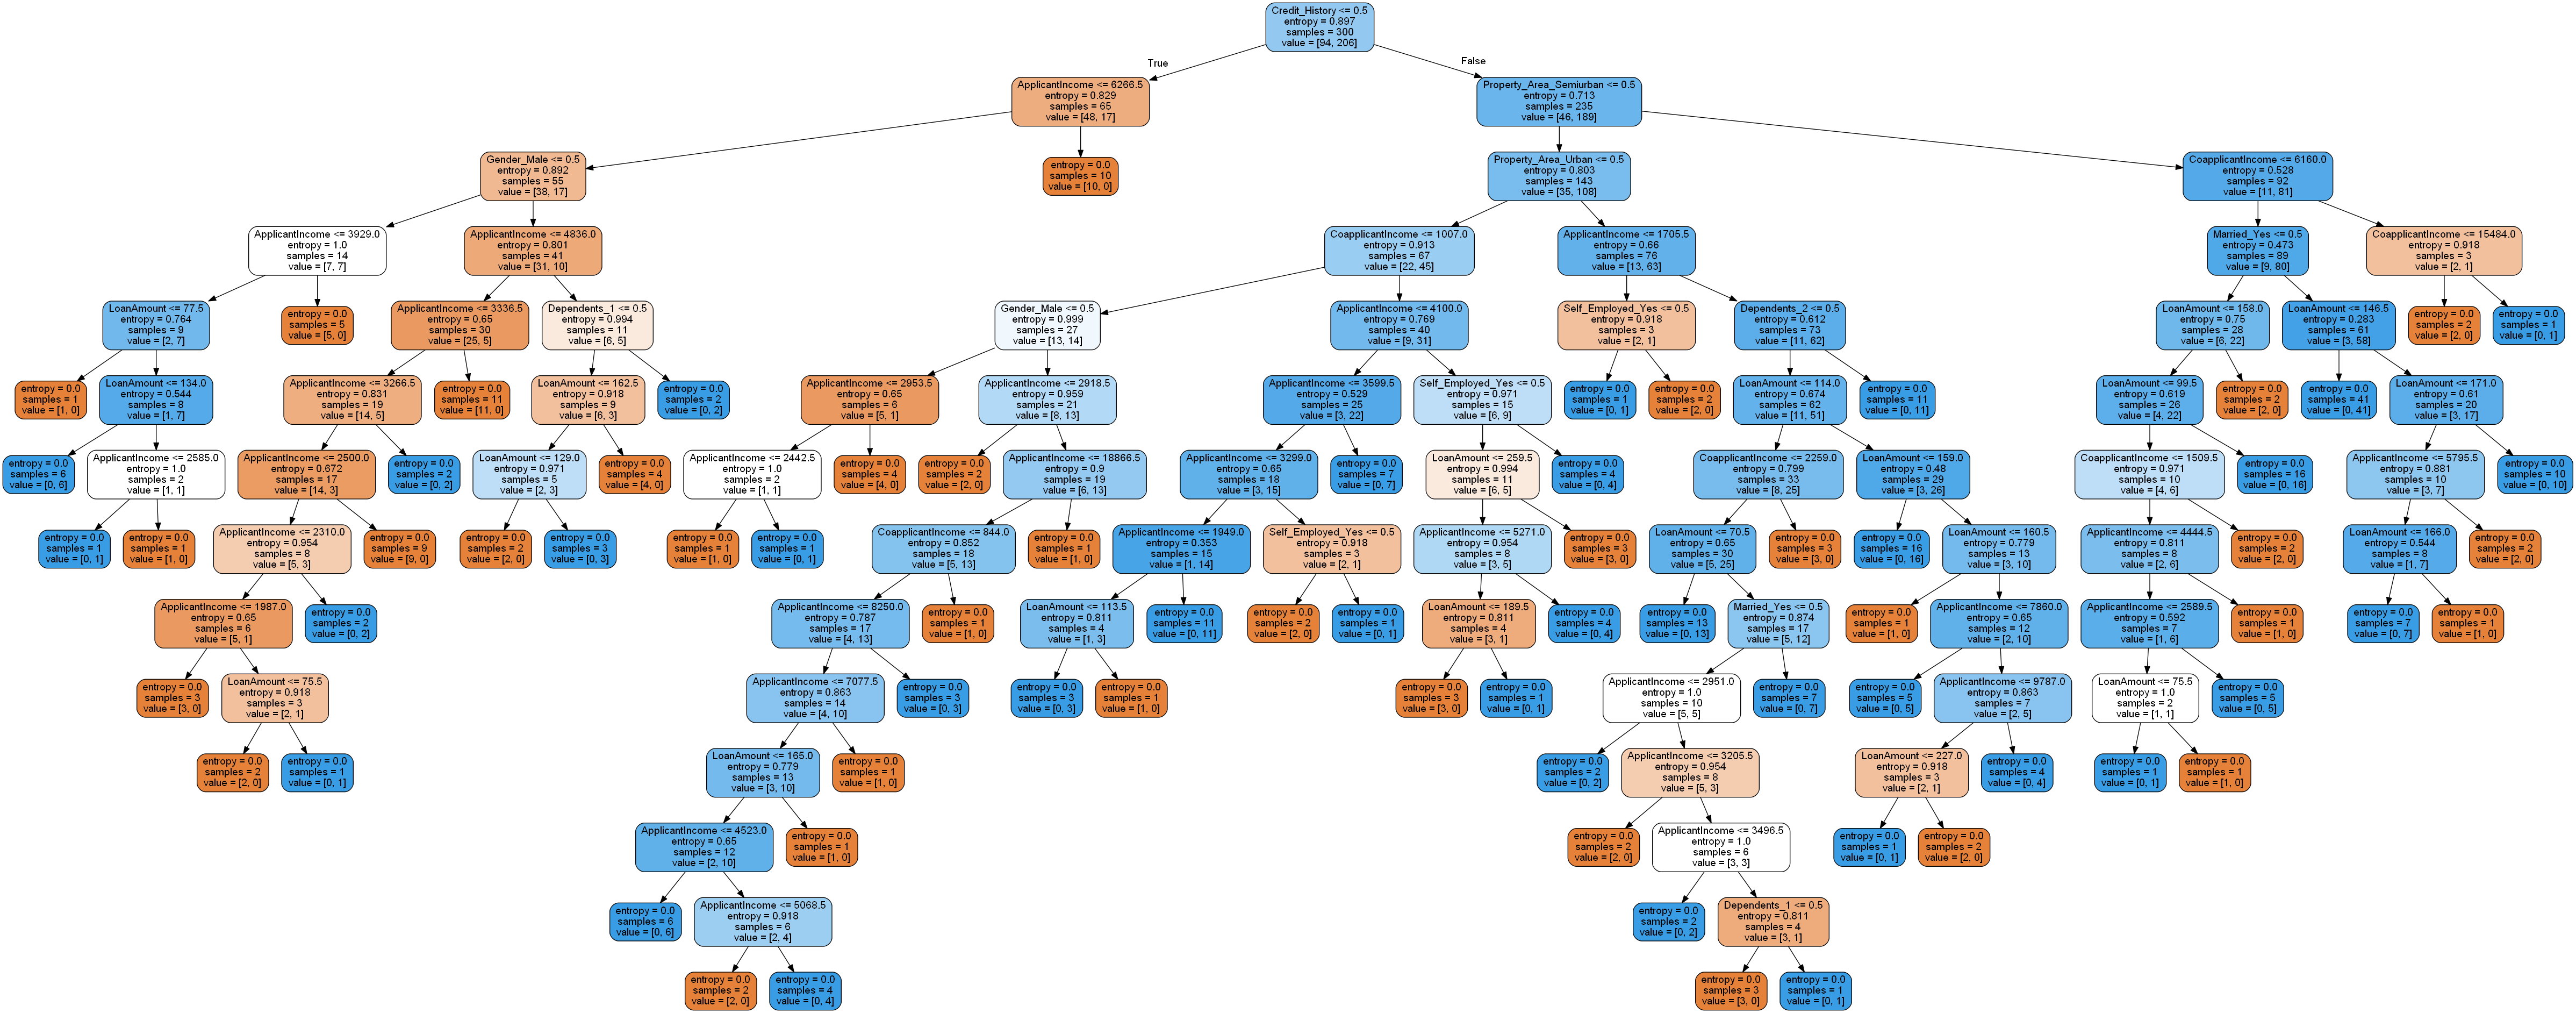

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO    
from IPython.display import Image  
import pydotplus
import graphviz

#fill in the blanks below. Pass the columns of the train data as feature_names. 

dot_data = StringIO()
export_graphviz(dtcf, out_file=dot_data, filled  = True, rounded = True, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

### Model building using Random Forests

- Initiating a random forest model with criterion as 'entropy' and report the metrics on the train and the validation set.
- trying with different values of n_estimators and figure out the best based on the earlier logic.
- Using the number of estimators figured out through the step above and build the final model.
- Report the result on the test data and add observations.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()  #initialise the model 

rf.fit(X_train, y_train)

#Report the metrics on the train and the validation set here
print(classification_report(y_train, rf.predict(X_train)))
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       1.00      0.99      0.99       206

   micro avg       0.99      0.99      0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

              precision    recall  f1-score   support

           0       0.48      0.45      0.46        58
           1       0.76      0.78      0.77       127

   micro avg       0.68      0.68      0.68       185
   macro avg       0.62      0.61      0.62       185
weighted avg       0.67      0.68      0.67       185



In [ ]:
from sklearn.metrics import recall_score
dict_recall = {}

for estimators in range(100,1001, 100):
    lista = []
    rfc = RandomForestClassifier(criterion = 'entropy',n_estimators = 200, random_state=42)
    rfc.fit(X_train, y_train)
    lista.append(recall_score(y_train, rfc.predict(X_train), pos_label = 0))
    lista.append(recall_score(y_val, rfc.predict(X_val), pos_label = 0))
    dict_recall[estimators] = lista

df = pd.DataFrame(dict_recall)
df.index = ['Train', 'Val']
df

,100,200,300,400,500,600,700,800,900,1000
Train,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
Val,0.525,0.525,0.525,0.525,0.525,0.525,0.525,0.525,0.525,0.525


In [ ]:
rfcf = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=42)

rfcf.fit(X_train, y_train)

# report the metrics on the test set here

print(classification_report(y_train, rf.predict(X_train)))
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       1.00      0.99      0.99       206

   micro avg       0.99      0.99      0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

              precision    recall  f1-score   support

           0       0.48      0.45      0.46        58
           1       0.76      0.78      0.77       127

   micro avg       0.68      0.68      0.68       185
   macro avg       0.62      0.61      0.62       185
weighted avg       0.67      0.68      0.67       185



**Observations:** 

The accuracy is 68% even after applying Random forest Classifier which implies that it is not much improvement over the performance of the tree.

### Business Insights
- Random forest is not an improvement over the performance of the tree in this case if recall for class 1 is to be considered.

- It gives better recall scores for the class 0 and overall accuracy score.

- Adaboost can help in improving the model in terms of the performance

- We found that the tree is working better than the models seen previously (KNN and Logistic Regression) suggesting that the data is better decsribed by a tree based model.

- We could not use GridSearch and RandomSearch directly here.

- The aim of the exercise was to improve the recall for the class 1 (cutomers' eligibility for loan). The tree did not do much better job on the test data. Therfore, the recall and precision for other class could also be important and in that case we will have to aim to improve the required metric.